# Libraries

In [38]:
import os
import sys
import csv
import requests
from bs4 import BeautifulSoup
import json
import datetime
from datetime import date, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import time
import investpy
from datetime import datetime

import tensorflow as tf
from tensorflow.keras import layers, models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from tensorflow.keras.models import load_model

# Continuouse Data

In [55]:
df = pd.read_csv('../data/processed_data_test.csv')
df.set_index('Date', inplace=True)
last = df.index[-1]
last = tuple(map(int,last.split('-')))

In [56]:
df

,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,gold_change,...,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi,direction
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,313.9,317.5,317.5,312.9,-0.99,1186.20,1184.0,1194.90,1167.3,0.18,...,17825.50,17757.00,-0.01,91.383,90.81,91.49,90.80,0.81,21.173357,0
2015-01-02,315.1,313.6,316.0,313.0,0.40,1186.20,1184.0,1194.90,1167.3,0.18,...,17951.80,17731.30,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,1
2015-01-03,282.0,314.8,314.8,282.0,-10.51,1186.20,1184.0,1194.90,1167.3,0.18,...,17951.80,17731.30,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,0
2015-01-04,258.8,282.0,288.9,258.8,-8.23,1186.20,1184.0,1194.90,1167.3,0.18,...,17951.80,17731.30,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,0
2015-01-05,273.2,261.0,276.5,260.5,5.57,1204.00,1187.8,1207.50,1177.8,1.50,...,17821.30,17475.90,-1.86,91.622,91.73,92.05,91.55,0.26,21.173357,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13,62937.2,61480.5,63443.2,60779.0,2.37,2344.15,2366.4,2370.85,2338.4,-0.94,...,39642.47,39403.62,-0.40,105.200,105.33,105.37,105.06,-0.12,47.501759,1
2024-05-14,61569.4,62936.8,63102.6,61156.9,-2.17,2359.90,2342.3,2365.20,2340.5,0.75,...,39616.15,39372.15,0.23,105.060,105.20,105.46,104.96,-0.13,51.959475,0
2024-05-15,66225.1,61569.4,66417.1,61357.5,7.56,2394.90,2362.9,2396.10,2357.1,1.35,...,39932.35,39685.06,0.33,104.210,105.06,105.06,104.18,-0.81,68.503494,1


In [ ]:
# if condition true: try to call the investpy, exception try again..

In [17]:
def get_btcdata():
    day = date.today() - timedelta(days=1)
    tday = date.today() + timedelta(days=1)
    data_lastday = datetime(*last).date()
    last_day = datetime(*last).date() + timedelta(days=1)
    if data_lastday < day:
        from_day = last_day.strftime("%d/%m/%Y")
        to_day = tday.strftime("%d/%m/%Y")

        btc_data = investpy.get_crypto_historical_data(crypto='bitcoin',
                                                from_date=from_day,
                                                to_date=to_day)

        btcdf = pd.DataFrame(btc_data)
        btcdf = btcdf.drop(columns=['Volume','Currency'])
        btcdf = btcdf.rename(columns={'Open':'btc_open','High':'btc_high','Low':'btc_low','Close':'btc_price'})
        df1 = pd.DataFrame(btcdf, columns=['btc_price', 'btc_open', 'btc_high', 'btc_low'])
        df1.fillna(method='ffill')
        df1.fillna(method='bfill')
        df1['btc_change']=round(((df1['btc_price']-df1['btc_open'])/df1['btc_open'])*100, 2)

        return df1

In [18]:
df1 = get_btcdata()
df1.head()

,btc_price,btc_open,btc_high,btc_low,btc_change
Date,,,,,
2024-05-18,66917.5,67036.6,67361.4,66636.1,-0.18
2024-05-19,67160.1,66919.0,67332.4,66843.6,0.36


In [59]:
data_lastday = datetime(*last).date()

In [63]:
str(data_lastday)

'2024-05-17'

In [74]:
data_lastday = pd.to_datetime(str(data_lastday)).date()

In [75]:
data_lastday

datetime.date(2024, 5, 17)

In [80]:
df.iloc[-1]['btc_open']

65231.1

In [76]:
df.loc[data_lastday]

KeyError: datetime.date(2024, 5, 17)

In [82]:


# Define the data
data = {
    'Date': ['2024-05-18', '2024-05-19'],
    'btc_price': df.iloc[-1]['btc_open'],
    'btc_open': df.iloc[-1]['btc_open'],
    'btc_high': None,
    'btc_low': None,
    'btc_change':None
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Print the DataFrame
df


,btc_price,btc_open,btc_high,btc_low,btc_change
Date,,,,,
2024-05-18,None,None,None,None,None
2024-05-19,None,None,None,None,None


In [32]:
def is_weekend(d):
    # weekday() method returns 5 for Saturday and 6 for Sunday
    if d.weekday() >= 5:
        return 1
    else:
        return 0

In [39]:
datetime(*last).date()

datetime.date(2024, 5, 17)

In [50]:
def get_golddata():
    day = date.today() - timedelta(days=1)
    tday = date.today() + timedelta(days=1)
    data_lastday = datetime(*last).date()
    last_day = datetime(*last).date() + timedelta(days=1)
    if data_lastday < day:
        from_day = last_day.strftime("%d/%m/%Y")
        to_day = tday.strftime("%d/%m/%Y")

    
        #weekend error handling
        d1 = last_day + timedelta(days=1)
        d2 = date.today()
        if d1 == d2 and is_weekend(d1)==1 and is_weekend(d2)==1:
            data_z = {
                'Date': [last_day, d1],
                'gold_price': None,
                'gold_open': None,
                'gold_high': None,
                'gold_low': None,
                'gold_change':None}

            
            df2 = pd.DataFrame(data_z)
            df2['Date'] = pd.to_datetime(df2['Date'])
            df2.set_index('Date', inplace=True)

            return df2

        else:
            gold_data = investpy.get_commodity_historical_data(commodity='gold',
                                                    from_date=from_day,
                                                    to_date=to_day)

            golddf = pd.DataFrame(gold_data)
            golddf = golddf.drop(columns=['Volume','Currency'])
            golddf = golddf.rename(columns={'Open':'gold_open','High':'gold_high','Low':'gold_low','Close':'gold_price'})
            df2 = pd.DataFrame(golddf, columns=['gold_price', 'gold_open', 'gold_high', 'gold_low'])
            df2.fillna(method='ffill')
            df2.fillna(method='bfill')
            df2['gold_change']=round(((df2['gold_price']-df2['gold_open'])/df2['gold_open'])*100, 2)

            return df2

In [51]:
df2 = get_golddata()
df2


2024-05-18 2024-05-20


,btc_price,btc_open,btc_high,btc_low,btc_change
Date,,,,,
2024-05-18,None,None,None,None,None
2024-05-19,None,None,None,None,None


In [53]:
df2.isna().sum()

btc_price     2
btc_open      2
btc_high      2
btc_low       2
btc_change    2
dtype: int64

In [7]:
def get_spdata():
    day = date.today() - timedelta(days=1)
    tday = date.today() + timedelta(days=1)
    data_lastday = datetime(*last).date()
    last_day = datetime(*last).date() + timedelta(days=1)
    if data_lastday < day:
        from_day = last_day.strftime("%d/%m/%Y")
        to_day = tday.strftime("%d/%m/%Y")

        sp500_data = investpy.get_index_historical_data(index='S&P 500',
                                                country='united states',
                                                from_date=from_day,
                                                to_date=to_day)

        spdf = pd.DataFrame(sp500_data)
        spdf = spdf.drop(columns=['Volume','Currency'])
        spdf = spdf.rename(columns={'Open':'sp_open','High':'sp_high','Low':'sp_low','Close':'sp_price'})
        df3 = pd.DataFrame(spdf, columns=['sp_price', 'sp_open', 'sp_high', 'sp_low'])
        df3.fillna(method='ffill')
        df3.fillna(method='bfill')
        df3['sp_change']=round(((df3['sp_price']-df3['sp_open'])/df3['sp_open'])*100, 2)

        return df3

In [ ]:
df3 = get_spdata()
df3.head()

In [8]:
def get_us30data():
    day = date.today() - timedelta(days=1)
    tday = date.today() + timedelta(days=1)
    data_lastday = datetime(*last).date()
    last_day = datetime(*last).date() + timedelta(days=1)
    if data_lastday < day:
        from_day = last_day.strftime("%d/%m/%Y")
        to_day = tday.strftime("%d/%m/%Y")

        us30_data = investpy.get_index_historical_data(index='Dow 30',
                                               country='united states',
                                               from_date=from_day,
                                               to_date=to_day)

        us30df = pd.DataFrame(us30_data)
        us30df = us30df.drop(columns=['Volume','Currency'])
        us30df = us30df.rename(columns={'Open':'us30_open','High':'us30_high','Low':'us30_low','Close':'us30_price'})
        df4 = pd.DataFrame(us30df, columns=['us30_price', 'us30_open', 'us30_high', 'us30_low'])
        df4.fillna(method='ffill')
        df4.fillna(method='bfill')
        df4['us30_change']=round(((df4['us30_price']-df4['us30_open'])/df4['us30_open'])*100, 2)

        return df4

In [ ]:
df4 = get_us30data()
df4.head()

In [9]:
def get_usdidxdata():
    day = date.today() - timedelta(days=1)
    tday = date.today() + timedelta(days=1)
    data_lastday = datetime(*last).date()
    last_day = datetime(*last).date() + timedelta(days=1)
    if data_lastday < day:
        from_day = last_day.strftime("%d/%m/%Y")
        to_day = tday.strftime("%d/%m/%Y")

        usdidx_data = investpy.get_index_historical_data(index='US Dollar Index',
                                               country='united states',
                                               from_date=from_day,
                                               to_date=to_day)

        usdidxdf = pd.DataFrame(usdidx_data)
        usdidxdf = usdidxdf.drop(columns=['Volume','Currency'])
        usdidxdf = usdidxdf.rename(columns={'Open':'usidx_open','High':'usidx_high','Low':'usidx_low','Close':'usidx_price'})
        df5 = pd.DataFrame(usdidxdf, columns=['usidx_price', 'usidx_open', 'usidx_high', 'usidx_low'])
        df5.fillna(method='ffill')
        df5.fillna(method='bfill')
        df5['usidx_change']=round(((df5['usidx_price']-df5['usidx_open'])/df5['usidx_open'])*100, 2)

        return df5

In [ ]:
df5 = get_usdidxdata()
df5.head()

In [59]:
def fetch_data(get_data_func, *args, max_attempts=5, timeout=30):
    """
    Fetch data using the given function with retries and timeout.
    
    Args:
        get_data_func: Function to fetch data.
        *args: Arguments for the get_data_func.
        max_attempts (int): Maximum number of attempts.
        timeout (int): Timeout in seconds between attempts.
        
    Returns:
        DataFrame: Fetched data or None if unsuccessful.
    """
    for _ in range(max_attempts):
        try:
            data = get_data_func(*args)
            if not data.empty:
                return data
        except Exception as e:
            pass
        time.sleep(timeout)
    return None

In [60]:
df1 = fetch_data(get_btcdata)
df2 = fetch_data(get_golddata)
df3 = fetch_data(get_spdata)
df4 = fetch_data(get_us30data)
df5 = fetch_data(get_usdidxdata)

In [66]:
df5

,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change
Date,,,,,
2024-05-08,105.52,105.43,105.64,105.39,0.09
2024-05-09,105.22,105.52,105.74,105.20,-0.28
2024-05-10,105.31,105.22,105.40,105.14,0.09
2024-05-12,105.33,105.31,105.33,105.29,0.02
2024-05-13,105.20,105.33,105.37,105.06,-0.12
2024-05-14,105.19,105.20,105.38,105.19,-0.01


In [ ]:
# if dataframes df1,df2..df5 are not None: concatenate them and update the csv file, else show the latest result

In [15]:
concatenated_df = pd.concat([df1,
                             df2,
                             df3,
                             df4,
                             df5],
                            axis=1, join='outer')

In [16]:
df_filled_forward = concatenated_df.fillna(method='ffill')
df_filled = df_filled_forward.fillna(method='bfill')
df_filled

,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,gold_change,...,us30_price,us30_open,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-12,61480.0,60826.6,61847.7,60647.1,1.07,2366.45,2368.45,2369.90,2366.00,-0.08,...,39431.64,39591.28,39642.47,39403.62,-0.4,105.33,105.31,105.33,105.29,0.02
2024-05-13,62937.2,61480.5,63443.2,60779.0,2.37,2344.15,2366.40,2370.85,2338.40,-0.94,...,39431.64,39591.28,39642.47,39403.62,-0.4,105.20,105.33,105.37,105.06,-0.12
2024-05-14,61980.0,62936.8,63102.6,61437.9,-1.52,2344.65,2344.10,2351.40,2340.55,0.02,...,39431.64,39591.28,39642.47,39403.62,-0.4,105.26,105.20,105.30,105.20,0.06


In [17]:
df_filled.index = df_filled.index.strftime('%Y-%m-%d')

In [18]:
df_copy = df.copy()

In [30]:
combined_df = pd.concat([df_copy, df_filled])
combined_df

,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,gold_change,...,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi,btc_next,direction
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,313.9,317.5,317.5,312.9,-0.99,1186.20,1184.00,1194.90,1167.30,0.18,...,17757.00,-0.01,91.383,90.81,91.49,90.80,0.81,21.173357,313.6,0.0
2015-01-02,315.1,313.6,316.0,313.0,0.40,1186.20,1184.00,1194.90,1167.30,0.18,...,17731.30,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,314.8,1.0
2015-01-03,282.0,314.8,314.8,282.0,-10.51,1186.20,1184.00,1194.90,1167.30,0.18,...,17731.30,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,282.0,0.0
2015-01-04,258.8,282.0,288.9,258.8,-8.23,1186.20,1184.00,1194.90,1167.30,0.18,...,17731.30,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,261.0,0.0
2015-01-05,273.2,261.0,276.5,260.5,5.57,1204.00,1187.80,1207.50,1177.80,1.50,...,17475.90,-1.86,91.622,91.73,92.05,91.55,0.26,21.173357,273.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-10,60796.9,63074.3,63454.3,60251.8,-3.61,2375.00,2353.50,2385.30,2352.00,0.91,...,39406.53,0.12,105.310,105.22,105.40,105.14,0.09,42.194896,60796.8,0.0
2024-05-11,60826.6,60796.8,61487.5,60499.3,0.05,2375.00,2353.50,2385.30,2352.00,0.91,...,39406.53,0.12,105.310,105.22,105.40,105.14,0.09,42.934296,60826.6,1.0
2024-05-12,61480.0,60826.6,61847.7,60647.1,1.07,2366.45,2368.45,2369.90,2366.00,-0.08,...,39403.62,-0.40,105.330,105.31,105.33,105.29,0.02,NaN,NaN,NaN


In [31]:
def RSI(close, period=14):
    delta = close.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

combined_df['btc_rsi'] = RSI(combined_df['btc_price'])
combined_df['btc_next'] = combined_df['btc_open'].shift(-1)

columns_of_interest = ['btc_price', 'btc_open', 'btc_high', 'btc_low', 'btc_change', 'gold_price', 'gold_open', 'gold_high', 'gold_low', 'gold_change', 
                       'sp_price', 'sp_open', 'sp_high', 'sp_low', 'sp_change', 'us30_price', 'us30_open', 'us30_high', 'us30_low', 'us30_change', 
                       'usidx_price', 'usidx_open', 'usidx_high', 'usidx_low', 'usidx_change', 'btc_rsi']
to_predict = combined_df.iloc[-1][columns_of_interest].values
new_df = combined_df.iloc[-10:, combined_df.columns.isin(columns_of_interest)]
combined_df = combined_df.drop(combined_df.index[-1])
combined_df['direction'] = combined_df.apply(lambda row: 1 if row['btc_next'] - row['btc_open'] > 0 else 0, axis=1)
combined_df = combined_df.fillna(method='bfill')
combined_df = combined_df.drop(columns='btc_next')
combined_df.tail()


,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,gold_change,...,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi,direction
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-09,63075.0,61207.3,63413.3,60671.4,3.05,2340.30,2316.50,2354.20,2312.9,1.03,...,39413.66,38995.05,0.83,105.22,105.52,105.74,105.20,-0.28,45.914988,1
2024-05-10,60796.9,63074.3,63454.3,60251.8,-3.61,2375.00,2353.50,2385.30,2352.0,0.91,...,39579.58,39406.53,0.12,105.31,105.22,105.40,105.14,0.09,42.194896,0
2024-05-11,60826.6,60796.8,61487.5,60499.3,0.05,2375.00,2353.50,2385.30,2352.0,0.91,...,39579.58,39406.53,0.12,105.31,105.22,105.40,105.14,0.09,42.934296,1
2024-05-12,61480.0,60826.6,61847.7,60647.1,1.07,2366.45,2368.45,2369.90,2366.0,-0.08,...,39642.47,39403.62,-0.40,105.33,105.31,105.33,105.29,0.02,45.579120,1
2024-05-13,62937.2,61480.5,63443.2,60779.0,2.37,2344.15,2366.40,2370.85,2338.4,-0.94,...,39642.47,39403.62,-0.40,105.20,105.33,105.37,105.06,-0.12,47.501759,1


In [32]:
new_df

,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,gold_change,...,us30_open,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-05,64173.0,63983.0,64769.0,63034.0,0.30,2308.60,2313.50,2330.70,2285.20,-0.04,...,38757.50,38765.00,38717.50,0.06,105.06,104.940,105.065,104.940,0.10,47.717773
2024-05-06,63280.0,64173.0,65625.0,62812.0,-1.39,2331.20,2312.80,2341.90,2300.60,0.98,...,38722.50,38880.00,38689.30,0.30,104.96,105.065,105.080,104.745,-0.10,39.329160
2024-05-07,62317.7,63163.1,64361.0,62294.1,-1.34,2324.20,2334.80,2338.70,2318.20,-0.45,...,38900.93,38977.61,38840.61,-0.04,105.43,105.150,105.450,105.030,0.27,38.143675
2024-05-08,61207.5,62304.9,62997.4,60894.2,-1.76,2322.30,2322.00,2329.60,2311.40,0.01,...,38818.90,39094.44,38818.90,0.61,105.52,105.430,105.640,105.390,0.09,40.467872
2024-05-09,63075.0,61207.3,63413.3,60671.4,3.05,2340.30,2316.50,2354.20,2312.90,1.03,...,39064.27,39413.66,38995.05,0.83,105.22,105.520,105.740,105.200,-0.28,45.914988
2024-05-10,60796.9,63074.3,63454.3,60251.8,-3.61,2375.00,2353.50,2385.30,2352.00,0.91,...,39466.52,39579.58,39406.53,0.12,105.31,105.220,105.400,105.140,0.09,42.194896
2024-05-11,60826.6,60796.8,61487.5,60499.3,0.05,2375.00,2353.50,2385.30,2352.00,0.91,...,39466.52,39579.58,39406.53,0.12,105.31,105.220,105.400,105.140,0.09,42.934296
2024-05-12,61480.0,60826.6,61847.7,60647.1,1.07,2366.45,2368.45,2369.90,2366.00,-0.08,...,39591.28,39642.47,39403.62,-0.40,105.33,105.310,105.330,105.290,0.02,45.579120
2024-05-13,62937.2,61480.5,63443.2,60779.0,2.37,2344.15,2366.40,2370.85,2338.40,-0.94,...,39591.28,39642.47,39403.62,-0.40,105.20,105.330,105.370,105.060,-0.12,47.501759


In [21]:
combined_df.tail(9)

,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,gold_change,...,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi,direction
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-05,64173.0,63983.0,64769.0,63034.0,0.30,2308.60,2313.50,2330.70,2285.2,-0.04,...,38765.00,38717.50,0.06,105.06,104.940,105.065,104.940,0.10,47.717773,1
2024-05-06,63280.0,64173.0,65625.0,62812.0,-1.39,2331.20,2312.80,2341.90,2300.6,0.98,...,38880.00,38689.30,0.30,104.96,105.065,105.080,104.745,-0.10,39.329160,0
2024-05-07,62317.7,63163.1,64361.0,62294.1,-1.34,2324.20,2334.80,2338.70,2318.2,-0.45,...,38977.61,38840.61,-0.04,105.43,105.150,105.450,105.030,0.27,38.143675,0
2024-05-08,61207.5,62304.9,62997.4,60894.2,-1.76,2322.30,2322.00,2329.60,2311.4,0.01,...,39094.44,38818.90,0.61,105.52,105.430,105.640,105.390,0.09,40.467872,0
2024-05-09,63075.0,61207.3,63413.3,60671.4,3.05,2340.30,2316.50,2354.20,2312.9,1.03,...,39413.66,38995.05,0.83,105.22,105.520,105.740,105.200,-0.28,45.914988,1
2024-05-10,60796.9,63074.3,63454.3,60251.8,-3.61,2375.00,2353.50,2385.30,2352.0,0.91,...,39579.58,39406.53,0.12,105.31,105.220,105.400,105.140,0.09,42.194896,0
2024-05-11,60826.6,60796.8,61487.5,60499.3,0.05,2375.00,2353.50,2385.30,2352.0,0.91,...,39579.58,39406.53,0.12,105.31,105.220,105.400,105.140,0.09,42.934296,1
2024-05-12,61480.0,60826.6,61847.7,60647.1,1.07,2366.45,2368.45,2369.90,2366.0,-0.08,...,39642.47,39403.62,-0.40,105.33,105.310,105.330,105.290,0.02,45.579120,1
2024-05-13,62937.2,61480.5,63443.2,60779.0,2.37,2344.15,2366.40,2370.85,2338.4,-0.94,...,39642.47,39403.62,-0.40,105.20,105.330,105.370,105.060,-0.12,47.501759,1


In [33]:
new_df.to_csv('../data/to_predict.csv', index=True)

In [22]:
last_9_rows_values = combined_df.iloc[-9:][columns_of_interest].values
last_10_rows_values = np.vstack([last_9_rows_values,to_predict])
last_9_test = combined_df.iloc[-9:]['direction'].values

In [23]:
dfnn = pd.DataFrame(last_10_rows_values)
dfnn

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,64173.0,63983.0,64769.0,63034.0,0.30,2308.60,2313.50,2330.70,2285.20,-0.04,...,38757.50,38765.00,38717.50,0.06,105.06,104.940,105.065,104.940,0.10,47.717773
1,63280.0,64173.0,65625.0,62812.0,-1.39,2331.20,2312.80,2341.90,2300.60,0.98,...,38722.50,38880.00,38689.30,0.30,104.96,105.065,105.080,104.745,-0.10,39.329160
2,62317.7,63163.1,64361.0,62294.1,-1.34,2324.20,2334.80,2338.70,2318.20,-0.45,...,38900.93,38977.61,38840.61,-0.04,105.43,105.150,105.450,105.030,0.27,38.143675
3,61207.5,62304.9,62997.4,60894.2,-1.76,2322.30,2322.00,2329.60,2311.40,0.01,...,38818.90,39094.44,38818.90,0.61,105.52,105.430,105.640,105.390,0.09,40.467872
4,63075.0,61207.3,63413.3,60671.4,3.05,2340.30,2316.50,2354.20,2312.90,1.03,...,39064.27,39413.66,38995.05,0.83,105.22,105.520,105.740,105.200,-0.28,45.914988
5,60796.9,63074.3,63454.3,60251.8,-3.61,2375.00,2353.50,2385.30,2352.00,0.91,...,39466.52,39579.58,39406.53,0.12,105.31,105.220,105.400,105.140,0.09,42.194896
6,60826.6,60796.8,61487.5,60499.3,0.05,2375.00,2353.50,2385.30,2352.00,0.91,...,39466.52,39579.58,39406.53,0.12,105.31,105.220,105.400,105.140,0.09,42.934296
7,61480.0,60826.6,61847.7,60647.1,1.07,2366.45,2368.45,2369.90,2366.00,-0.08,...,39591.28,39642.47,39403.62,-0.40,105.33,105.310,105.330,105.290,0.02,45.579120
8,62937.2,61480.5,63443.2,60779.0,2.37,2344.15,2366.40,2370.85,2338.40,-0.94,...,39591.28,39642.47,39403.62,-0.40,105.20,105.330,105.370,105.060,-0.12,47.501759
9,61980.0,62936.8,63102.6,61437.9,-1.52,2344.65,2344.10,2351.40,2340.55,0.02,...,39591.28,39642.47,39403.62,-0.40,105.26,105.200,105.300,105.200,0.06,53.125068


In [243]:
combined_df.to_csv('../data/processed_datav2.csv', index=True)

In [45]:



loaded_model = load_model('../models/dnn.h5')


predictions = loaded_model.predict(last_10_rows_values)

1/1 [==============================] - 0s 451ms/step


In [46]:
y_pred_binary = np.round(predictions).astype(int)


In [47]:
accuracy = accuracy_score(last_9_test, y_pred_binary[:-1])

In [48]:
accuracy

1.0

In [49]:
cm = confusion_matrix(last_9_test, y_pred_binary[:-1])

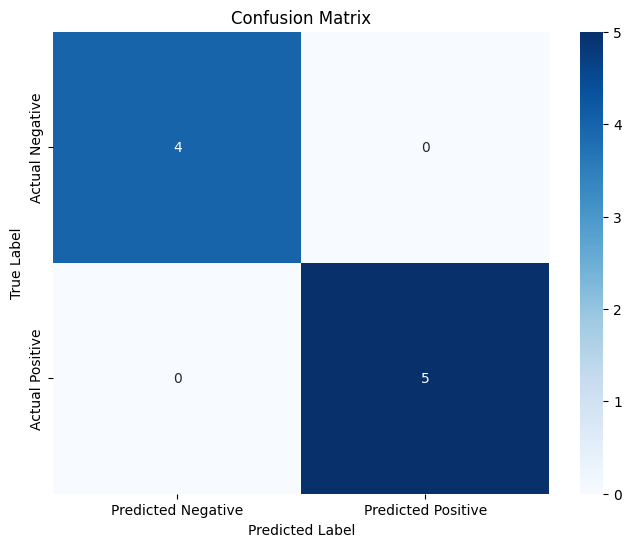

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
def fetch_data(get_data_func, *args, max_attempts=5, timeout=30):
    """
    Fetch data using the given function with retries and timeout.
    
    Args:
        get_data_func: Function to fetch data.
        *args: Arguments for the get_data_func.
        max_attempts (int): Maximum number of attempts.
        timeout (int): Timeout in seconds between attempts.
        
    Returns:
        DataFrame: Fetched data or None if unsuccessful.
    """
    for _ in range(max_attempts):
        try:
            data = get_data_func(*args)
            if not data.empty:
                return data
        except Exception as e:
            pass
        time.sleep(timeout)
    return None

In [38]:
dff1 = fetch_data(get_btcdata)
dff2 = fetch_data(get_golddata)
dff3 = fetch_data(get_spdata)
dff4 = fetch_data(get_us30data)
dff5 = fetch_data(get_usdidxdata)

In [40]:
dff2

,gold_price,gold_open,gold_high,gold_low,gold_change
Date,,,,,
2024-05-12,2366.45,2368.45,2369.90,2366.00,-0.08
2024-05-13,2344.15,2366.40,2370.85,2338.40,-0.94
2024-05-14,2344.80,2344.10,2351.40,2340.55,0.03
